# Stacked Model Visualization

In [11]:
cd /project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization

/project/bioinformatics/DLLab/s169682/Code/AutismProject/Parallelization


In [12]:
import keras
import os
import pandas as pd
import numpy as np
import pickle as pkl

import gc

Using TensorFlow backend.


In [94]:
sDataPath = '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Stacked/'

sDataPath=sDataPath+'EarlyChopped'
sDataPath

'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Stacked/EarlyChopped'

In [95]:
lsModels=[]
for i in range(50):
    if i<10:
        sModelNum='0'+ str(i)
    else:
        sModelNum=str(i)
    lsModels.append('Stack_'+sModelNum)



In [96]:
# %load IMPAC_FetchDLValidation.py
import os
import pandas as pd
import numpy as np
import pickle as pkl

lsModels=[]
for i in range(50):
    if i<10:
        sModelNum='0'+ str(i)
    else:
        sModelNum=str(i)
    lsModels.append('Stack_'+sModelNum)

pdSummaryData=pd.DataFrame(index=lsModels, columns=['Mean CV ROC', 'CV0 ROC', 'CV1 ROC', 'CV2 ROC'])

# Loop through all Cross Validation Results and re-save the mean ROC AUC
for i in range(50):

    # Get model number tag
    if i<10:
        sModelNum='0'+ str(i)
    else:
        sModelNum=str(i)
    
    # if the files exist, load the files into the pandas frame
    if os.path.isfile(sDataPath + '/Stack_' + sModelNum + 'CrossVal0ModelROCScore.p') and os.path.isfile(sDataPath + '/Stack_' + sModelNum + 'CrossVal1ModelROCScore.p') and os.path.isfile(sDataPath + '/Stack_' + sModelNum + 'CrossVal2ModelROCScore.p'):
        CV0=pkl.load(open((sDataPath + '/Stack_' + sModelNum + 'CrossVal0ModelROCScore.p'), 'rb'))
        CV1=pkl.load(open((sDataPath + '/Stack_' + sModelNum + 'CrossVal1ModelROCScore.p'), 'rb'))
        CV2=pkl.load(open((sDataPath + '/Stack_' + sModelNum + 'CrossVal2ModelROCScore.p'), 'rb'))

        CVMean=(CV0+CV1+CV2)/3.0
        
        pdSummaryData.loc['Stack_'+sModelNum, 'Mean CV ROC']=CVMean
        pdSummaryData.loc['Stack_'+sModelNum, 'CV0 ROC']=CV0
        pdSummaryData.loc['Stack_'+sModelNum, 'CV1 ROC']=CV1
        pdSummaryData.loc['Stack_'+sModelNum, 'CV2 ROC']=CV2
        
        pkl.dump(CVMean, open((sDataPath + 'Stack_' + sModelNum + 'MeanCVROCScore.p'), 'wb'))

# Walk through the directory and find the model with the highest ROC score
flMax = 0
sBest = 'run failed'

for root, dirs, files in os.walk(sDataPath):
    files.sort()

    for file in files:
        if file.endswith('MeanCVROCScore.p'):
            if os.path.isfile(os.path.join(sDataPath, file)):
                flMeanVal=pkl.load(open(os.path.join(sDataPath, file), 'rb'))
            if flMeanVal>flMax:
                flMax=flMeanVal
                sBest=file

print('  ',sBest, ' ', flMax)


   Stack_33MeanCVROCScore.p   0.5720880808029769


In [97]:
pdSummaryData

,Mean CV ROC,CV0 ROC,CV1 ROC,CV2 ROC
Stack_00,0.553315,0.613558,0.494326,0.552061
Stack_01,0.473758,0.458919,0.477812,0.484543
Stack_02,0.498515,0.505878,0.526843,0.462823
Stack_03,0.521803,0.460415,0.59735,0.507644
Stack_04,0.486051,0.47353,0.486171,0.498451
Stack_05,0.512696,0.518519,0.545634,0.473936
Stack_06,0.449128,0.437513,0.502073,0.407799
Stack_07,0.477958,0.488753,0.478593,0.466527
Stack_08,0.524706,0.467278,0.551682,0.555159
Stack_09,0.510445,0.536663,0.600748,0.393925


In [98]:
for sCol in pdSummaryData.columns:
    pdSummaryData[sCol] = pd.to_numeric(pdSummaryData[sCol]).fillna(0)

In [99]:
pdSummaryData.nlargest(5, 'Mean CV ROC')

,Mean CV ROC,CV0 ROC,CV1 ROC,CV2 ROC
Stack_33,0.572088,0.586069,0.583792,0.546404
Stack_00,0.553315,0.613558,0.494326,0.552061
Stack_38,0.552965,0.611315,0.522256,0.525323
Stack_44,0.549439,0.527693,0.575297,0.545326
Stack_30,0.546484,0.580802,0.528950,0.529701


In [100]:
dModelHistories={}
def fFetchModelHist(iModel):
    if iModel<10:
        sModel='Stack_0'+str(iModel)
    else:
        sModel='Stack_'+str(iModel)
    print('   '+sModel)
    dCVHist={}
    for iCV in range(3):
        if os.path.isfile(os.path.join(sDataPath, (sModel+'CrossVal'+str(iCV)+'ModelHistory.p'))):
            ModelHist=pkl.load(open(os.path.join(sDataPath, (sModel+'CrossVal'+str(iCV)+'ModelHistory.p')), 'rb'))
            dCVHist[('CV'+str(iCV))]=ModelHist#.history
            del(ModelHist)
        else:
            dCVHist[('CV'+str(iCV))]=0
    dModelHistories[sModel]=dCVHist
    del(dCVHist)
    gc.collect()
    return dModelHistories[sModel]

In [101]:
import matplotlib.pyplot as plt
def fPlot(iModel, sType, pdSummaryData, sBest):
    
    dCVHist=fFetchModelHist(iModel)
    
    if iModel<10:
        sModel='Stack_0'+str(iModel)
    else:
        sModel='Stack_'+str(iModel)
    
    plt.style.use('seaborn-white')
    
    plt.figure(1)
    plt.plot(range(len(dCVHist['CV0'][sType])), dCVHist['CV0'][sType],
             range(len(dCVHist['CV1'][sType])), dCVHist['CV1'][sType],
             range(len(dCVHist['CV2'][sType])), dCVHist['CV2'][sType]
            )
    plt.gca().set_prop_cycle(None)
    plt.plot(range(len(dCVHist['CV0']['val_'+sType])), dCVHist['CV0']['val_'+sType], '--', 
             range(len(dCVHist['CV1']['val_'+sType])), dCVHist['CV1']['val_'+sType], '--',
             range(len(dCVHist['CV2']['val_'+sType])), dCVHist['CV2']['val_'+sType], '--',
             solid_capstyle='round'
            )


    plt.legend(('Training Fold 1', 'Training Fold 2', 'Training Fold 3',
               'Validation Fold 1', 'Validation Fold 3', 'Validation Fold 3'),
               loc='center left', bbox_to_anchor=(1,0.5)
              )
    
    flTestPerformance = pkl.load(open('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Stacked/'+sModel+'FullModelROCScore.p', 'rb'))
        
    plt.title('Training ' + sType + ' for Architecture Number ' + sModel
              +'\n ' + sBest
              +'\n Mean Cross Validation Performance: ' + str(pdSummaryData.loc[sModel, 'Mean CV ROC'])
             +'\n Test Performance: ' + str(flTestPerformance))
    plt.xlabel('Epoch')
    plt.grid(False)
    plt.ylabel('Accuracy')
    plt.show()
    plt.close()

plt.show()

In [102]:
dCVAllHist={}
for i in range(50):
    dCVAllHist[i]=fFetchModelHist(i)


   Stack_00
   Stack_01
   Stack_02
   Stack_03
   Stack_04
   Stack_05
   Stack_06
   Stack_07
   Stack_08
   Stack_09
   Stack_10
   Stack_11
   Stack_12
   Stack_13
   Stack_14
   Stack_15
   Stack_16
   Stack_17
   Stack_18
   Stack_19
   Stack_20
   Stack_21
   Stack_22
   Stack_23
   Stack_24
   Stack_25
   Stack_26
   Stack_27
   Stack_28
   Stack_29
   Stack_30
   Stack_31
   Stack_32
   Stack_33
   Stack_34
   Stack_35
   Stack_36
   Stack_37
   Stack_38
   Stack_39
   Stack_40
   Stack_41
   Stack_42
   Stack_43
   Stack_44
   Stack_45
   Stack_46
   Stack_47
   Stack_48
   Stack_49


In [103]:
dCVAllHist[5]

{'CV0': {'val_loss': [0.8605064700861447,
   0.8603675345905492,
   0.8602036354971714,
   0.8600247551183231,
   0.8598446826465794,
   0.8596691069055776,
   0.8594878599291942,
   0.8593182114304089,
   0.8591587738912614,
   0.8589935791297038,
   0.8588371941300689,
   0.8586890248001599,
   0.858545084468654,
   0.8584141594464662,
   0.8582959605045006,
   0.8581834152096608,
   0.8580690544159686,
   0.8579620201079572,
   0.8578677392396771,
   0.8577752347852363,
   0.8576892106259455],
  'val_acc': [0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116,
   0.5532786777762116],
  '

   Stack_16


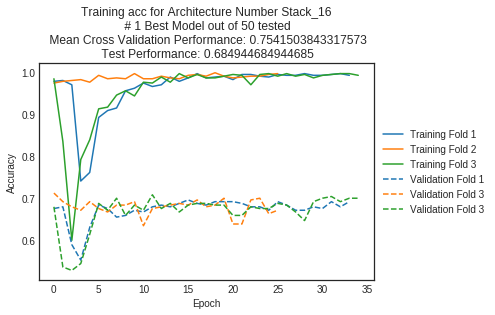

   Stack_04


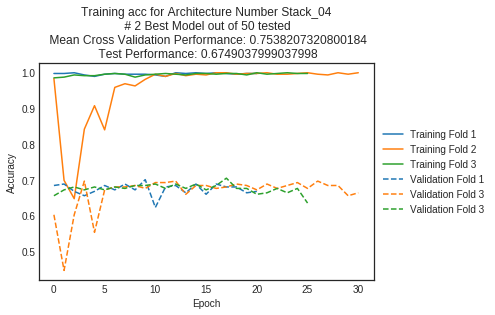

   Stack_41


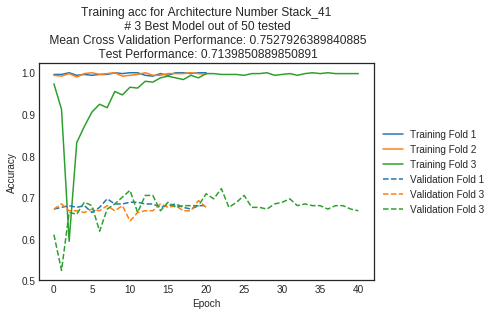

   Stack_43


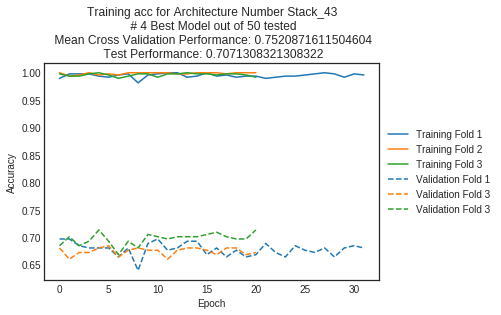

   Stack_00


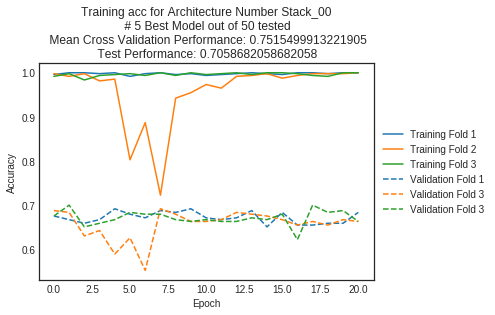

In [87]:
lsModels=[16,4,41,43,0]
sType='acc'
i=0
for iModel in lsModels:
    i=i+1
    sBest = '# ' + str(i) + ' Best Model out of 50 tested'
    fPlot(iModel, sType, pdSummaryData, sBest)
